In [1]:
import sys
import gensim
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель
from gensim.models import KeyedVectors # Семантические вектора

import numpy as np

In [2]:
import zipfile
import wget

In [3]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [5]:
# Собираем список нужных нам слов (глагол + существительные)
import re
words = ['играть_VERB']
words_final = ['играть_VERB']
with open("HW2_igrat'.txt", 'r', encoding="utf-8") as file:
    for line in file:
        words.append(re.split(r'_|\t', line)[1])
for word in words:
    if word != "играть_VERB":
        word_final = word + '_NOUN'
        words_final.append(word_final)
words_final

['играть_VERB',
 'роль_NOUN',
 'музыка_NOUN',
 'ребенок_NOUN',
 'оркестр_NOUN',
 'актер_NOUN',
 'человек_NOUN',
 'время_NOUN',
 'карта_NOUN',
 'музыкант_NOUN',
 'солнце_NOUN',
 'дитя_NOUN',
 'спектакль_NOUN',
 'комедия_NOUN',
 'жизнь_NOUN',
 'игра_NOUN',
 'артист_NOUN',
 'мальчик_NOUN',
 'свадьба_NOUN',
 'женщина_NOUN',
 'день_NOUN',
 'песня_NOUN',
 'девочка_NOUN',
 'вечер_NOUN',
 'пьеса_NOUN',
 'вальс_NOUN',
 'команда_NOUN',
 'улыбка_NOUN',
 'ребята_NOUN',
 'актриса_NOUN',
 'ветер_NOUN',
 'мальчишка_NOUN',
 'шахматы_NOUN',
 'гамлет_NOUN',
 'возможность_NOUN',
 'раз_NOUN',
 'песнь_NOUN',
 'год_NOUN',
 'румянец_NOUN',
 'рука_NOUN',
 'отец_NOUN',
 'россия_NOUN',
 'ночь_NOUN',
 'желание_NOUN',
 'футбол_NOUN',
 'сцена_NOUN',
 'судьба_NOUN',
 'мужчина_NOUN',
 'театр_NOUN',
 'мать_NOUN',
 'девушка_NOUN',
 'карта_NOUN',
 'свет_NOUN',
 'джаз_NOUN',
 'ребятишки_NOUN',
 'скрипка_NOUN',
 'деньги_NOUN',
 'гармонь_NOUN',
 'шопен_NOUN',
 'прятки_NOUN',
 'лицо_NOUN',
 'луч_NOUN',
 'гость_NOUN',
 'кор

In [30]:
# Извлекаем вектор для каждого
for word_final in words_final:
    # есть ли слово в модели?
    if word_final in model:
        print(word_final)
        print(model[word_final])
    else:
        print('Увы, слова "%s" нет в модели!' % word_final)

играть_VERB
[-0.5288247   2.0507498   0.71786404  0.54867375 -0.51383156 -0.31863314
  4.2511854   3.1364803  -1.8961718  -2.9469638   1.731744    0.2949621
  0.15672685 -1.2459257  -2.0208507  -0.02296666  0.613703    3.6342163
  0.10430302 -1.8631822  -3.1115808   3.1456366   0.12043818  0.3824095
  2.0281878  -1.8728944   3.2511442  -0.8158009   4.886176   -4.575812
 -3.010331    1.165928    2.147287    5.2840414   3.8041155   0.32918277
  0.05182515 -1.9476149  -3.9571643  -2.5195346  -0.87475324  3.8705332
  2.9331384  -2.6297183   3.2285445   1.2143557  -0.6019345   1.9508742
 -0.2619462  -1.4303906   0.6813129  -1.6587096  -0.18753679  1.4944764
 -0.3323763  -5.778149   -3.084414   -3.1332102   0.35780555 -0.7587567
  1.8167548  -1.3791324   1.3688294  -0.02909197 -0.95390564 -0.8099849
 -1.5874316  -2.7894332   3.9890974  -0.3140173   2.0858862   2.012114
  2.203675    1.2814945   0.8629677   2.0410511  -3.7253299  -2.6408746
 -0.28338945 -1.0404878  -1.37072     1.5531912   3.

In [31]:
# Аддитивная модель композиции
for i in range (1, len(words_final)):
    print(model[words_final[0]] + model[words_final[i]])

[-1.0694740e+00  2.4746766e+00  1.0907489e+00  3.6257796e+00
  1.5803893e+00  3.6137261e+00  1.4932058e+00  7.5668116e+00
 -4.6954365e+00 -3.8385859e+00 -4.0338554e+00  6.5032303e-01
  2.7276957e-01 -4.4376574e+00  6.8919230e-01  2.9880187e-01
 -3.3662286e+00  3.6601317e+00  4.6395955e+00 -3.7198482e+00
 -4.5311770e+00  9.0498123e+00  5.4630156e+00 -2.7523303e+00
  1.0491121e+00 -2.1362529e+00  6.1404462e+00  4.8939395e-01
  3.3271627e+00 -7.3849735e+00 -4.4184465e+00  1.4295759e+00
 -1.5339582e+00  4.1927795e+00  3.1711810e+00 -2.9649932e+00
  1.7027828e-01  1.7489910e+00 -4.6685538e+00 -7.7886307e-01
  1.8172376e+00  2.0136199e+00  7.2046766e+00 -7.6758118e+00
  2.8171129e+00  2.4933205e+00 -2.6368518e+00  2.5977643e+00
  1.6062146e+00  2.3305571e-01  2.8063750e+00 -5.5709057e+00
 -1.9278952e+00  7.0804775e-01 -5.3005176e+00 -8.1703901e+00
 -6.6760540e+00 -1.3364724e+01  2.9616466e+00  1.9643018e+00
 -1.5261054e-02 -1.9085515e+00  2.4316640e+00 -3.5253592e+00
 -4.3130598e+00 -7.37048

In [32]:
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster

In [33]:
# Создание матрицы
array = []
for j in range (1, len(words_final)):
    line = (model[words_final[0]] + model[words_final[j]])
    vector = []
    for item in line:
        vector.append(float(item))
    array.append(vector)
X = np.array(array)
print (X.shape)

(113, 300)


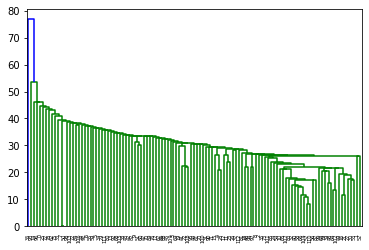

In [34]:
# Иерархическая кластеризация
Z = hcluster.linkage(X)
plt.figure()
dn = hcluster.dendrogram(Z)
plt.show()

In [35]:
# Проверим количество кластеров на более низком пороге, чтобы выделить бóльшее их кол-во
clusters = hcluster.fcluster(Z, 1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 17


In [36]:
print(clusters)

[13  3  3  3  3  3  3  1  3  3  3  3  3  3 15  3  3  3  3  3  3  3  3  3
  3 12  3  3  3  3  3  3  3  7  3  3 17  3  3  3  3  3  3  3  3  3  3  3
  3  3  1  3  3  3  3  3  3  3  3  3  3  3  9  3  3  3  3  3  3  3  3  3
  4  3  3  8  3 11 10  3  3  3  3  3  2  3  3  3  3  3  3  3  3 16  3  3
 14  3  6  3  3  3  3  5  3  3  2  3  3  3  3  3  3]


In [37]:
# Метод К-средних
from sklearn.cluster import KMeans

In [38]:
# Предположим, что типов игр может быть немало — возьмём 20 кластеров
kmeans = KMeans(n_clusters=20).fit(X)
kmeans.labels_
# Выводим массив из номеров кластеров

array([18, 12,  4, 12, 18, 17,  3,  7, 12, 15, 14,  2,  2,  0, 10, 18,  4,
        4, 17, 11, 12,  4, 19,  2,  3,  8, 14,  4, 18, 15,  4,  9,  3,  5,
        3,  3,  6, 14, 14,  4,  3, 19,  3,  9,  2,  0, 17,  2,  4,  4,  7,
       15, 12,  4,  3,  3,  3,  3,  3, 17, 15, 14, 14,  4, 14,  3,  3, 11,
        3,  9, 14,  3, 12,  3, 12,  5, 14,  5,  3,  4, 15, 14,  2,  3,  5,
        4,  1,  3,  3,  3, 14, 14,  3, 16,  3,  3, 13,  3,  5,  4, 14,  3,
       14,  3,  3,  1,  5,  3, 19,  3,  3, 14, 14], dtype=int32)

In [39]:
# Определение центра кластера
kmeans.cluster_centers_

array([[-3.59404534,  2.81747437,  0.24359548, ...,  0.51554036,
         1.73462006, -1.52389729],
       [ 1.93183082,  4.75321174, -0.10418424, ...,  0.56210968,
        -0.08783227, -1.78886187],
       [-1.53291557, -0.08121806,  1.64029595, ..., -1.04623605,
         2.70777732, -3.04322537],
       ...,
       [-4.5546914 ,  4.66274178,  0.86747369, ...,  1.19943552,
         1.45575815, -0.91586429],
       [-1.25490931,  1.71382278,  1.09253938, ..., -0.2917087 ,
         0.8332306 , -0.37579673],
       [-1.5332276 , -0.09204153,  1.71638099, ..., -0.39569619,
         1.31649995,  0.59838255]])

In [126]:
# Выводим по 3 элемента, наиболее близких к центру каждого кластера
current_string = []
our_string = []
for q in range(20):
    if np.count_nonzero(kmeans.labels_ == q) >= 3:
        for w in range(1, 101):
            current_string.append(model.similar_by_vector(kmeans.cluster_centers_[q], topn=101)[w][0])
        for e in current_string:
            if (e in words_final) and ('_NOUN' in e) and ('играть' not in e):
                our_string.append(e)
        print('играть_' + our_string[0][:-5] + ', ' + 'играть_' + our_string[1][:-5] + ', ' + 'играть_' + our_string[2][:-5])
        current_string = []
        our_string = []

играть_спектакль, играть_сцена, играть_пьеса
играть_шарманка, играть_скрипка, играть_игра
играть_мальчик, играть_девочка, играть_девушка
играть_фактор, играть_игра, играть_процесс
играть_футбол, играть_теннис, играть_шахматы
играть_музыкант, играть_музыка, играть_джаз
играть_девушка, играть_шарманка, играть_мальчик
играть_солнце, играть_звезда, играть_луч
играть_мужчина, играть_женщина, играть_девушка
играть_актер, играть_актриса, играть_артист
играть_вечер, играть_утро, играть_ночь


### Краткий анализ результатов
#### Большинство кластеров правильно выделили общее семантическое сходства (например, «играть в футбол-теннис/шахматы», «играет актёр/актриса/артист», «играет вечером/утром/ночью» получились однородными), но есть и не очень удачные кластеры, которые, возможно, корректируются при потенциальной смене распределения кластеров